In [1]:
# Intro to Linear Programming with SciPy
from scipy.optimize import linprog

Linear Programming Demo

We want to maximize renewable energy production by deciding how many solar panels and wind turbines to install, while staying under budget and land limitations.

We will use `scipy.optimize.linprog` (imported in the first code block), a built-in function from **SciPy** library. It’s used to solve optimization problems, such as minimizing cost or maximizing output, under a set of rules or constraints.

---

**Recall:**

- **Decision variables**: “the questions you’re asking”  
- **Linear objectives**: “the goals you need to achieve”  
- **Linear constraints**: “the limitations you’re facing”


**1. Define the objective function**

> Suppose each solar panel gives us 3 units of energy, and each wind turbine gives 5.

Note: linprog minimizes by default, so we need to use negative signs to flip the problem (becomes a maximization problem).



In [2]:
# We want to maximize the energy unit, which is given by 3 * solar + 5 * wind
# linprog only minimizes, so we multiply the coefficients by -1
                  #Maximize energy → 3x + 5y → minimize -3x - 5y
objective = [-3, -5]


**2. Add constraints**

Suppose we can only spend $12,000 and use up to 40 units of land space, so we need equations to define these limits.

Given,

Solar panel: $1000 cost, 3 land units (Each)

Wind turbine: $1500 cost, 5 land units (each)



In [3]:
# Constraints:
# 1000 * solar + 1500 * wind ≤ 12000 (budget limit)
# 3 * solar + 5 * wind ≤ 40 (land space limit)

constraint_coeffs = [
    [1000, 1500],  # Budget coefficients
    [3, 5]         # Land coefficients
]

constraint_limits = [12000, 40]  # constraints, given on the RHS of the equations


**3. Set variable bounds**

In our example, we need to make sure that there is no negative number of solar panels or wind turbines, so we set the variable bounds.

In [4]:
# number of solar panel or wind turbine must be non-negative

x_bounds = (0, None)
y_bounds = (0, None)

**4. Solve the problem**

Finally, we use `linprog()` to actually solve the optimization problem.

Learn more about it here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html


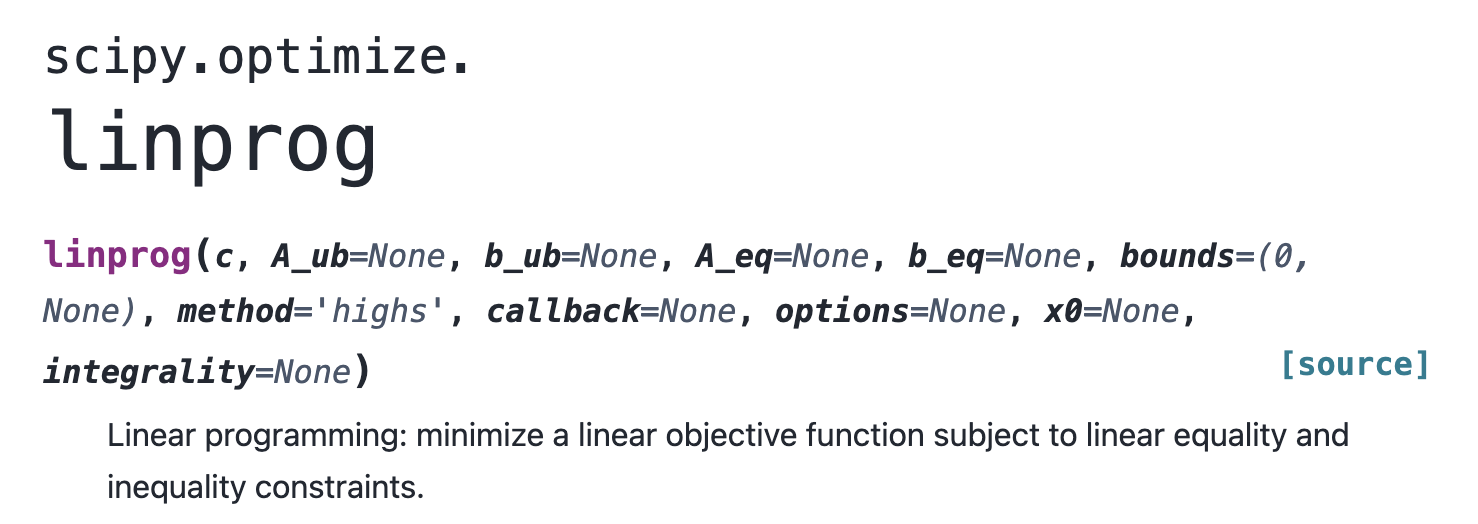

In [5]:
# Solve the problem
solution = linprog(objective, A_ub= constraint_coeffs, b_ub= constraint_limits,
                   bounds=[x_bounds, y_bounds], method='highs')


The output for `linprog` include

*  .success: whether the givens are valid
*  .x: best decision eg. x= [2.0, 4.0] means installing 2 solar and 4 wind
* .fun:  result value eg. fun = -36.0 shows that the total energy produced is 36



**5. Results**

example output:

In [6]:
# Show results
if solution.success:
    print("Optimal solution found:")
    #index 0 for solar panel, first item in the solution list
    print(f"# of Solar panels to install: {solution.x[0]:.2f}")
    print(f"# of Wind turbines to install: {solution.x[1]:.2f}")
    print(f"Total energy produced: {-solution.fun:.2f}")
else:
    print("No solution found.") #when .success == False

Optimal solution found:
# of Solar panels to install: 0.00
# of Wind turbines to install: 8.00
Total energy produced: 40.00


**Lists vs NumPy arrays**

In [7]:
# NumPy array
import numpy as np
c = np.array([1, 2, 3])
d = np.array([4, 5, 6])
print (c + d)  # array([5, 7, 9]) #vectorized addition

# Python list
a = [1, 2, 3]
b = [4, 5, 6]
print(a + b)  # [1, 2, 3, 4, 5, 6] #concatenation



[5 7 9]
[1, 2, 3, 4, 5, 6]
